In [171]:
import warnings
warnings.filterwarnings('ignore')

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
titanic=pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
titanic.shape

(891, 12)

In [175]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [176]:
titanic.Age=titanic['Age'].fillna(round(titanic.Age.mean()))

In [177]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [178]:
titanic=titanic.drop(['PassengerId','Name','Ticket','Cabin'],1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [179]:
dummy=pd.get_dummies(titanic.Sex,drop_first=False)
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [180]:
titanic=pd.concat([titanic,dummy],axis=1)

In [181]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [182]:
titanic=titanic.drop(['Sex'],1)

In [183]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


In [184]:
titanic=titanic.drop(['Embarked'],1)

In [185]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [186]:
titanic.describe(percentiles=[0.015,0.25,0.5,0.75,0.997])

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208,0.352413,0.647587
std,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
1.5%,0.000000,1.000000,1.350000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
99.7%,1.000000,3.000000,71.000000,8.000000,5.000000,345.278636,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [187]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.420613
SibSp       3.695352
Parch       2.749117
Fare        4.787317
female      0.618921
male       -0.618921
dtype: float64

In [188]:
titanic_new=titanic[titanic['Age']<=71]
titanic.shape

(891, 8)

In [189]:
titanic_new.shape

(889, 8)

In [190]:
titanic_new=titanic_new[titanic_new['Fare']<347]
titanic_new.shape

(886, 8)

In [201]:
titanic_new.skew()

Survived    0.488773
Pclass     -0.641705
Age         0.354293
SibSp       3.684609
Parch       2.744455
Fare        3.184219
female      0.614979
male       -0.614979
dtype: float64

In [ ]:
titanic_new=titanic_new[titanic_new.SibSp]

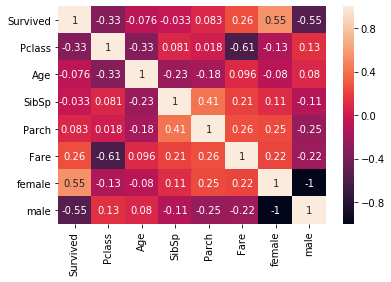

In [191]:
sns.heatmap(titanic_new.corr(),annot=True)

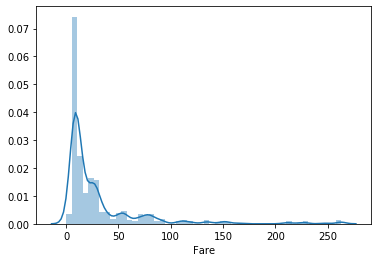

In [202]:
sns.distplot(titanic_new.Fare)

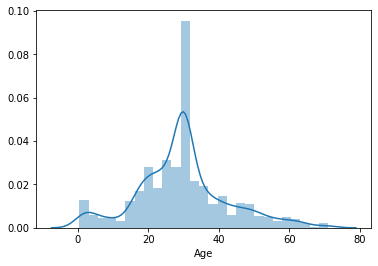

In [193]:
sns.distplot(titanic_new.Age)

In [194]:
X=titanic_new.drop(['Survived'],1)

In [195]:
y=titanic_new.Survived

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [198]:
import statsmodels.api as sm

In [199]:
X_train_sm=sm.add_constant(X_train)
train_gls=sm.GLS(y_train,X_train_sm,family=sm.families.Binomial()).fit()

In [200]:
print(train_gls.summary())

                            GLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.400
Model:                            GLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     68.23
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           6.30e-65
Time:                        13:54:15   Log-Likelihood:                -272.73
No. Observations:                 620   AIC:                             559.5
Df Residuals:                     613   BIC:                             590.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7134      0.060     11.980      0.0

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
lrmod=LogisticRegression()

In [165]:
from sklearn.preprocessing import LabelEncoder

In [166]:
le=LabelEncoder()

In [167]:
y_train_encoded=le.fit_transform(y_train)

In [168]:
y_train_encoded

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,

In [169]:
lrmod.fit(X_train,y_train_encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
from sklearn.feature_selection import RFE
rfe=RFE(lrmod,4)

In [137]:
rfe.fit(X_train,y_train_encoded)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=4, step=1, verbose=0)

In [138]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Pclass', True, 1),
 ('Age', False, 2),
 ('SibSp', True, 1),
 ('female', True, 1),
 ('male', True, 1)]

In [101]:
X_train.head()

,Survived,Pclass,SibSp,Parch,female,male
195,1,1,0,0,1,0
385,0,2,0,0,0,1
257,1,1,0,0,1,0
39,1,3,1,0,1,0
234,0,2,0,0,0,1


In [139]:
X_train_rfe=X_train.drop(['Age'],1)

In [140]:
X_train_rfe.head()

,Pclass,SibSp,female,male
195,1,0,1,0
385,2,0,0,1
257,1,0,1,0
39,3,1,1,0
234,2,0,0,1


In [141]:
X_train_rfe.head()

,Pclass,SibSp,female,male
195,1,0,1,0
385,2,0,0,1
257,1,0,1,0
39,3,1,1,0
234,2,0,0,1


In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)

In [149]:
vif

,Features,VIF
3,male,6.609946
2,female,3.346411
0,Pclass,1.033581
1,SibSp,1.023875


In [150]:
X_test_new=X_test[X_test.columns]
X_train_new=X_train[X_test.columns]

KeyError: "['Fare', 'Parch'] not in index"

In [143]:
lrmod.fit(X_train_rfe,y_train_encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_train_pred=lrmod.predict(X_train_rfe)

In [145]:
from sklearn.metrics import r2_score

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
print(accuracy_score(y_train_encoded,y_train_pred))

0.8032258064516129


In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
print(confusion_matrix(y_train_encoded,y_train_pred))

[[341  44]
 [ 78 157]]


In [ ]:
print(sen(y_train_encoded,y_train_pred))